In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv("/content/test developing 2 new.csv")

# Clean the data: replace '#NUM!' with NaN and convert all columns to numeric
df.replace("#NUM!", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Define features and target variable
X = df[['Labor force total LN',
        'Gross capital formation (% of GDP) LN',
        'IQ',
        'FD LN',
        'Economic Globalization LN']]

y = df['GDP per capita (current US$) LN']

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Manually compute RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = (abs((y_test - y_pred_rf) / y_test)).mean() * 100

# Print performance metrics
print("Random Forest Regressor Results:")
print(f"R² Score: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")

Random Forest Regressor Results:
R² Score: 0.883
RMSE: 0.35
MAE: 0.25
MAPE: 3.06%


In [ ]:



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid,
                              cv=5, scoring='r2', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)  # FIXED VARIABLE NAMES

# Best Random Forest model
best_rf = rf_grid_search.best_estimator_

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid,
                              cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)  # FIXED VARIABLE NAMES

# Best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_

# Predict using the best models
y_pred_best_rf = best_rf.predict(X_test)  # FIXED VARIABLE NAMES
y_pred_best_gb = best_gb.predict(X_test)  # FIXED VARIABLE NAMES

# Compute performance metrics for tuned Random Forest
r2_best_rf = r2_score(y_test, y_pred_best_rf)  # FIXED VARIABLE NAMES
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf) ** 0.5
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = (abs((y_test - y_pred_best_rf) / y_test)).mean() * 100

# Compute performance metrics for tuned Gradient Boosting
r2_best_gb = r2_score(y_test, y_pred_best_gb)  # FIXED VARIABLE NAMES
rmse_best_gb = mean_squared_error(y_test, y_pred_best_gb) ** 0.5
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mape_best_gb = (abs((y_test - y_pred_best_gb) / y_test)).mean() * 100

# Return results
results = {
    "Best Random Forest": {"R2": r2_best_rf, "RMSE": rmse_best_rf, "MAE": mae_best_rf, "MAPE": mape_best_rf},
    "Best Gradient Boosting": {"R2": r2_best_gb, "RMSE": rmse_best_gb, "MAE": mae_best_gb, "MAPE": mape_best_gb},
}

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Random Forest Results:
R2: 0.883
RMSE: 0.348
MAE: 0.247
MAPE: 3.057

Best Gradient Boosting Results:
R2: 0.884
RMSE: 0.347
MAE: 0.226
MAPE: 2.807


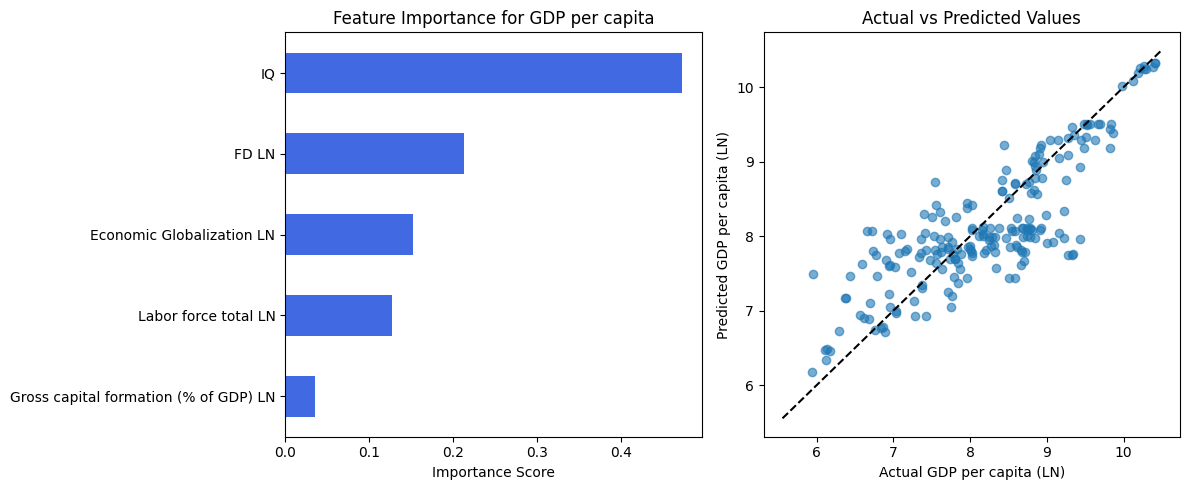


=== Model Performance ===
R² Score: 0.6871
RMSE: 0.5702
MAE: 0.4339

=== Dataset Information ===
Total samples: 1035
Training samples: 828
Testing samples: 207

Generating partial dependence plots...


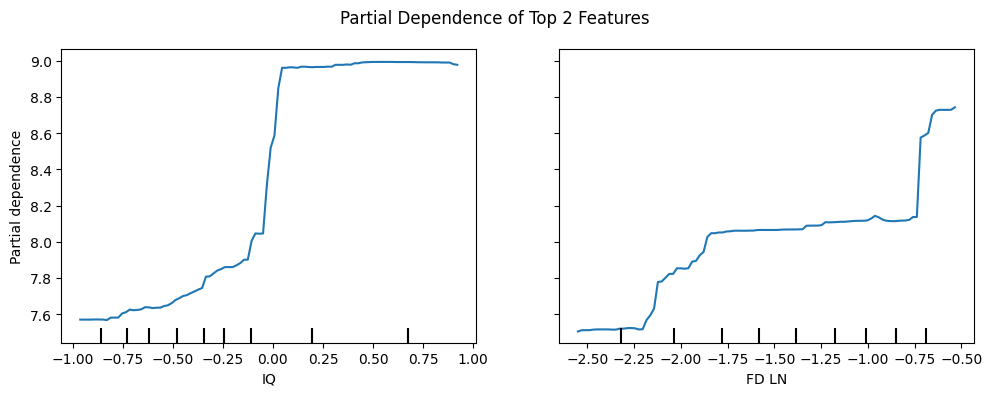

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your actual file path

# ====== UPDATED VARIABLES ======
TARGET = 'GDP per capita (current US$) LN'  # Changed target variable
PREDICTORS = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]

# Verify required columns exist
missing_cols = [col for col in [TARGET] + PREDICTORS if col not in df.columns]
if missing_cols:
    print("Error: The following required columns are missing:")
    print(missing_cols)
    print("\nAvailable columns in your dataset:")
    print(df.columns.tolist())
    raise ValueError("Missing required columns in dataset")

# Clean data - remove rows with missing values
df_clean = df[[TARGET] + PREDICTORS].dropna()

# Define features and target
X = df_clean[PREDICTORS]
y = df_clean[TARGET]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ====== VISUALIZATIONS ======
plt.figure(figsize=(12, 5))

# 1. Feature Importance
plt.subplot(1, 2, 1)
importances = pd.Series(rf_model.feature_importances_, index=PREDICTORS)
importances.sort_values().plot(kind='barh', color='royalblue')
plt.title("Feature Importance for GDP per capita")
plt.xlabel("Importance Score")

# 2. Actual vs Predicted
plt.subplot(1, 2, 2)
y_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual GDP per capita (LN)")
plt.ylabel("Predicted GDP per capita (LN)")
plt.title("Actual vs Predicted Values")

plt.tight_layout()
plt.show()

# ====== MODEL EVALUATION ======
print("\n=== Model Performance ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

print("\n=== Dataset Information ===")
print(f"Total samples: {len(df_clean)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Additional: Partial dependence plots for top 2 features
from sklearn.inspection import PartialDependenceDisplay
print("\nGenerating partial dependence plots...")
fig, ax = plt.subplots(figsize=(10, 4))
top_features = importances.sort_values(ascending=False).index[:2]
PartialDependenceDisplay.from_estimator(
    rf_model, X, top_features, ax=ax
)
plt.suptitle("Partial Dependence of Top 2 Features")
plt.tight_layout()
plt.show()

Available columns in your dataset:
['countries', 'Year', 'Code', 'Labor force total', 'Labor force total LN', 'GDP growth (annual %)', 'GDP per capita growth (annual %)', 'GDP (current US$)', 'GDP (current US$) LN', 'GDP per capita (current US$)', 'GDP per capita (current US$) LN', 'Gross capital formation (% of GDP)', 'Gross capital formation (% of GDP) LN', 'IQ', 'FD', 'FD LN', 'Economic Globalization', 'Economic Globalization LN']


<ipython-input-3-5728e6714847>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("#NUM!", np.nan, inplace=True)


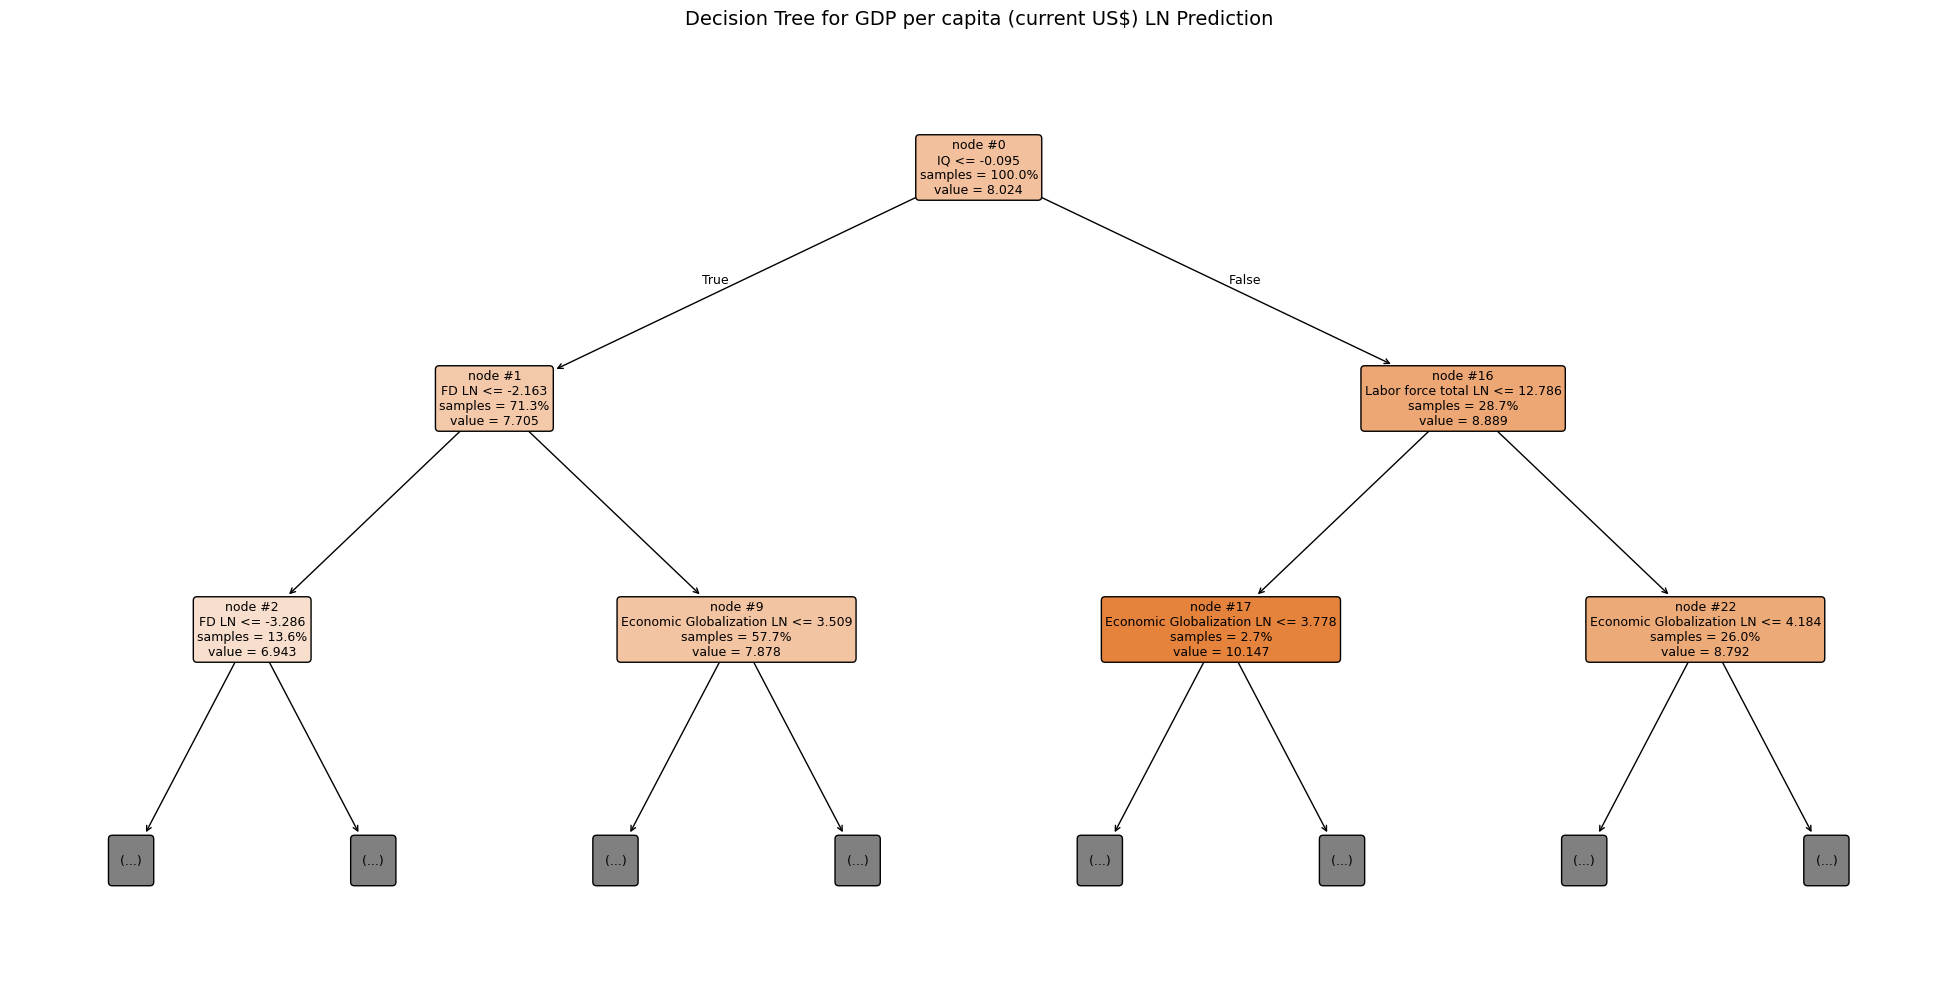

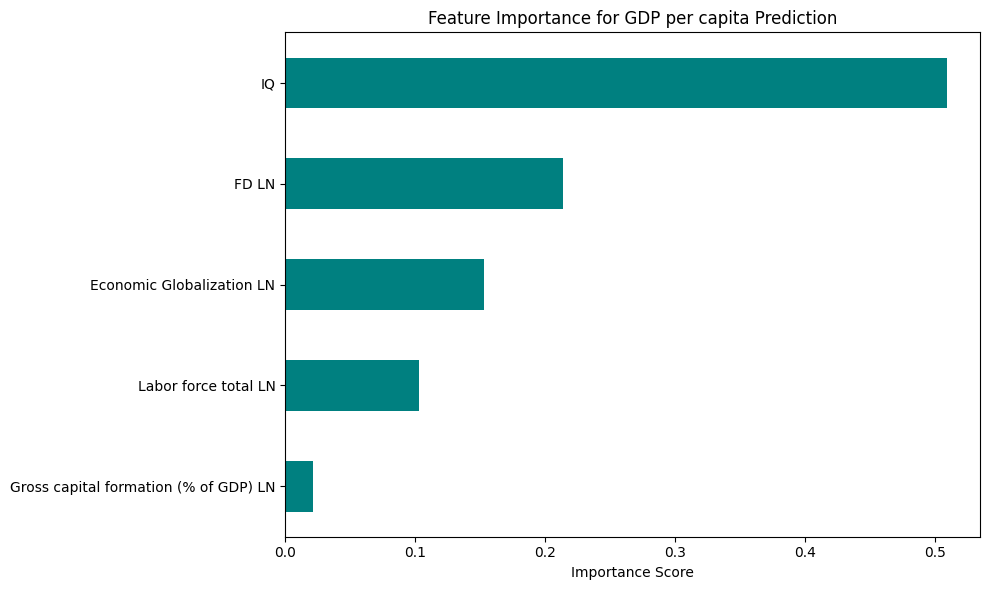


Model Performance:
R² Score: 0.6935
RMSE: 0.5777
Training samples: 828
Test samples: 208


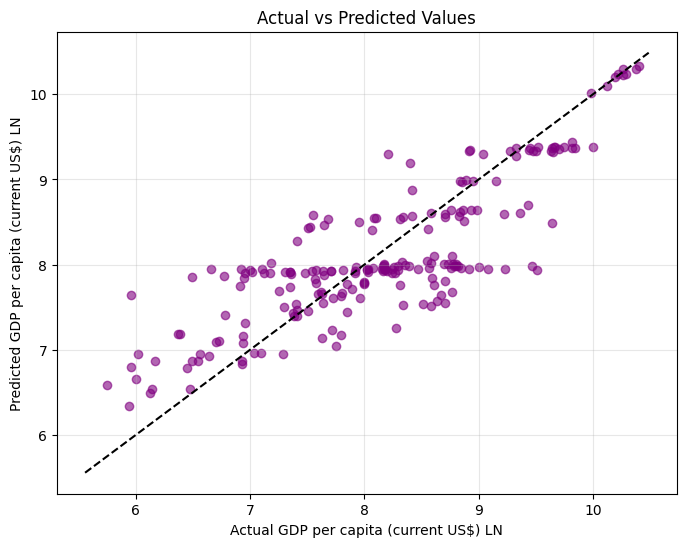

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error

# First, check available columns
print("Available columns in your dataset:")
print(df.columns.tolist())

# Updated configuration with GDP per capita as target
selected_columns = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN',
    'GDP per capita (current US$) LN'  # Changed target variable
]

# Filter to existing columns
existing_columns = [col for col in selected_columns if col in df.columns]
df = df[existing_columns]

# Print warnings for missing columns
missing_columns = set(selected_columns) - set(existing_columns)
if missing_columns:
    print(f"\nWarning: Missing expected columns: {missing_columns}")
    print("Please verify your column names.")

# Data cleaning
df.replace("#NUM!", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing data
target_column = existing_columns[-1]
df_clean = df.dropna(subset=[target_column]).fillna(df.mean())

# Prepare features and target
X = df_clean[existing_columns[:-1]]
y = df_clean[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=4,  # Slightly deeper for better accuracy
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Enhanced visualization
plt.figure(figsize=(25, 12))
plot_tree(
    rf_model.estimators_[0],
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=2,  # More readable with 2 levels
    fontsize=9,
    proportion=True,
    impurity=False,
    node_ids=True
)
plt.title(f"Decision Tree for {target_column} Prediction", pad=20, fontsize=14)
plt.show()

# Feature importance with sorted values
plt.figure(figsize=(10, 6))
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance for GDP per capita Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Model evaluation
y_pred = rf_model.predict(X_test)
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel(f"Actual {target_column}")
plt.ylabel(f"Predicted {target_column}")
plt.title("Actual vs Predicted Values")
plt.grid(True, alpha=0.3)
plt.show()

Available columns in dataset:
['Labor force total LN', 'Gross capital formation (% of GDP) LN', 'IQ', 'FD LN', 'Economic Globalization LN', 'GDP per capita (current US$) LN']

Missing values before cleaning:
GDP per capita (current US$) LN          0
Labor force total LN                     0
Gross capital formation (% of GDP) LN    0
IQ                                       0
FD LN                                    1
Economic Globalization LN                0
dtype: int64

Missing values after cleaning:
GDP per capita (current US$) LN          0
Labor force total LN                     0
Gross capital formation (% of GDP) LN    0
IQ                                       0
FD LN                                    0
Economic Globalization LN                0
dtype: int64


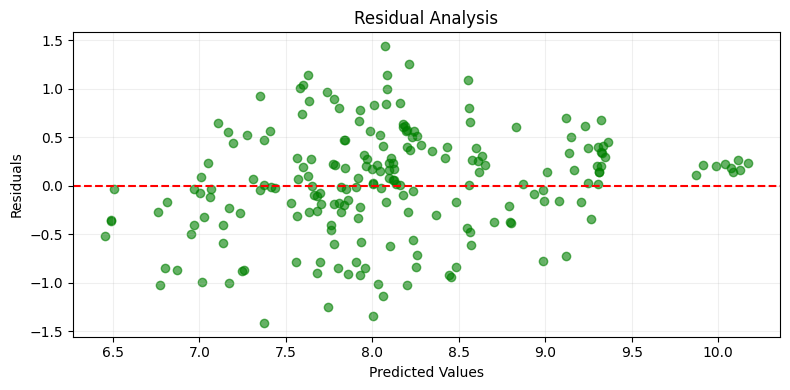

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load your dataset (uncomment and replace with your file path)
# df = pd.read_csv("your_data.csv")

# ====== CONFIGURATION ======
TARGET = 'GDP per capita (current US$) LN'
PREDICTORS = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]

# ====== DATA VALIDATION ======
print("Available columns in dataset:")
print(df.columns.tolist())

# Verify required columns exist
missing_cols = [col for col in [TARGET] + PREDICTORS if col not in df.columns]
if missing_cols:
    print("\nERROR: Missing required columns:")
    print(missing_cols)
    raise ValueError("Please check your column names")

# ====== DATA PREPARATION ======
# Clean and prepare data
df_clean = df[[TARGET] + PREDICTORS].copy()
df_clean.replace("#NUM!", np.nan, inplace=True)
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Handle missing data
print("\nMissing values before cleaning:")
print(df_clean.isna().sum())

df_clean = df_clean.dropna(subset=[TARGET])
df_clean = df_clean.fillna(df_clean.mean())

print("\nMissing values after cleaning:")
print(df_clean.isna().sum())

# ====== MODEL SETUP ======
X = df_clean[PREDICTORS]
y = df_clean[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



# ====== RESIDUAL ANALYSIS ======
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

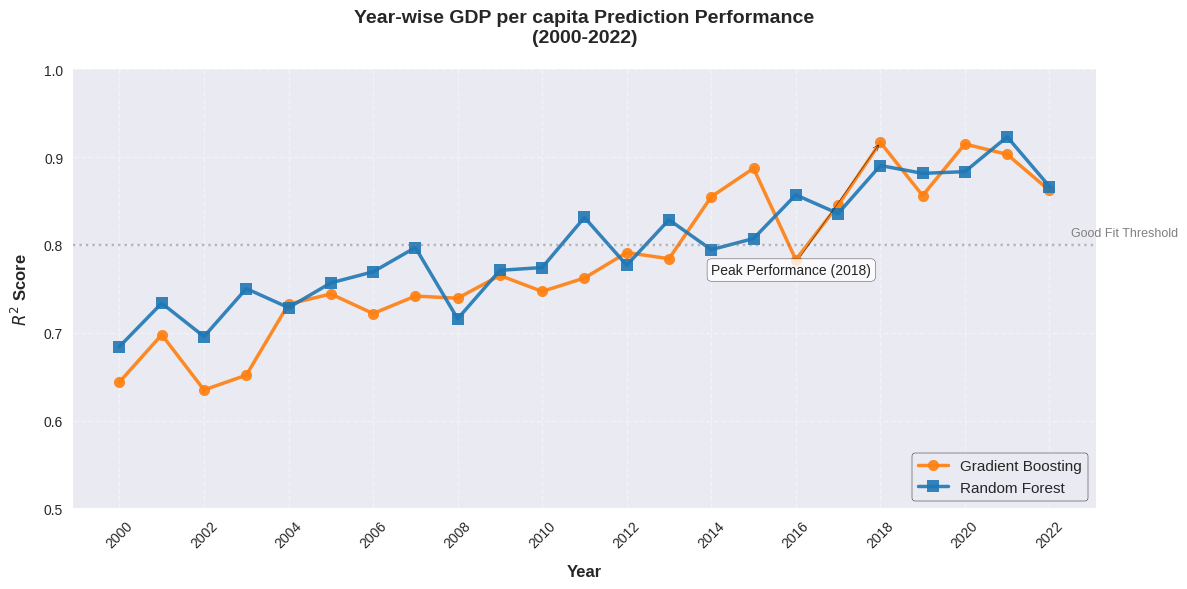

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')

# Sample data - replace with your actual results
years = np.arange(2000, 2023)  # Example years from 2000-2022
r2_gb = np.linspace(0.65, 0.92, len(years)) + np.random.normal(0, 0.03, len(years))  # Simulated GB scores
r2_rf = np.linspace(0.68, 0.90, len(years)) + np.random.normal(0, 0.03, len(years))  # Simulated RF scores

# Create figure with larger size
plt.figure(figsize=(12, 6), dpi=100)

# Plot lines with markers and custom styling
gb_line, = plt.plot(years, r2_gb,
                   color='#FF7F0E',  # Orange
                   marker='o',
                   markersize=8,
                   linewidth=2.5,
                   alpha=0.9,
                   label='Gradient Boosting')

rf_line, = plt.plot(years, r2_rf,
                   color='#1F77B4',  # Blue
                   marker='s',
                   markersize=8,
                   linewidth=2.5,
                   alpha=0.9,
                   label='Random Forest')

# Add labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel(r'$R^2$ Score', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Year-wise GDP per capita Prediction Performance\n(2000-2022)',
          fontsize=14, fontweight='bold', pad=20)

# Adjust axes
plt.xticks(years[::2], rotation=45)  # Show every other year
plt.ylim(0.5, 1.0)
plt.yticks(np.arange(0.5, 1.05, 0.1))

# Add grid
plt.grid(True, linestyle='--', alpha=0.4)

# Add legend
legend = plt.legend(handles=[gb_line, rf_line],
                   loc='lower right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black',
                   fontsize=11)

# Add annotation for best performing year
max_year = years[np.argmax(r2_gb)]
plt.annotate(f'Peak Performance ({max_year})',
             xy=(max_year, r2_gb.max()),
             xytext=(max_year-4, r2_gb.max()-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add horizontal line at R²=0.8 for reference
plt.axhline(y=0.8, color='gray', linestyle=':', alpha=0.5)
plt.text(years[-1]+0.5, 0.81, 'Good Fit Threshold', color='gray', fontsize=9)

# Adjust layout and show
plt.tight_layout()
plt.show()

Text(0, 0.5, 'RMSE')

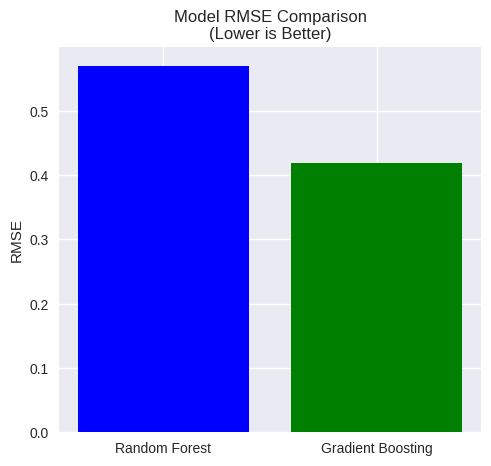

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv("your_data.csv")  # Uncomment and replace with your file path

# ====== VARIABLE CONFIGURATION ======
TARGET = 'GDP per capita (current US$) LN'
PREDICTORS = [
    'Labor force total LN',
    'Gross capital formation (% of GDP) LN',
    'IQ',
    'FD LN',
    'Economic Globalization LN'
]

# Verify all required columns exist
missing_cols = [col for col in [TARGET] + PREDICTORS if col not in df.columns]
if missing_cols:
    print("ERROR: Missing required columns:")
    print(missing_cols)
    print("\nAvailable columns in your dataset:")
    print(df.columns.tolist())
    raise ValueError("Missing required columns")

# ====== DATA PREPARATION ======
# Clean data - convert to numeric and drop missing values
df_clean = df[[TARGET] + PREDICTORS].apply(pd.to_numeric, errors='coerce').dropna()

X = df_clean[PREDICTORS]
y = df_clean[TARGET]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ====== MODEL TRAINING ======
# Initialize models with improved parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# ====== MODEL EVALUATION ======
def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return {'Model': name, 'RMSE': rmse, 'R2': r2}

# Evaluate both models
results = pd.DataFrame([
    evaluate_model("Random Forest", rf_model, X_test, y_test),
    evaluate_model("Gradient Boosting", gb_model, X_test, y_test)
])

# ====== VISUALIZATIONS ======
plt.figure(figsize=(12, 5))

# 1. Model Comparison Plot
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['RMSE'], color=['blue', 'green'])
plt.title("Model RMSE Comparison\n(Lower is Better)")
plt.ylabel("RMSE")

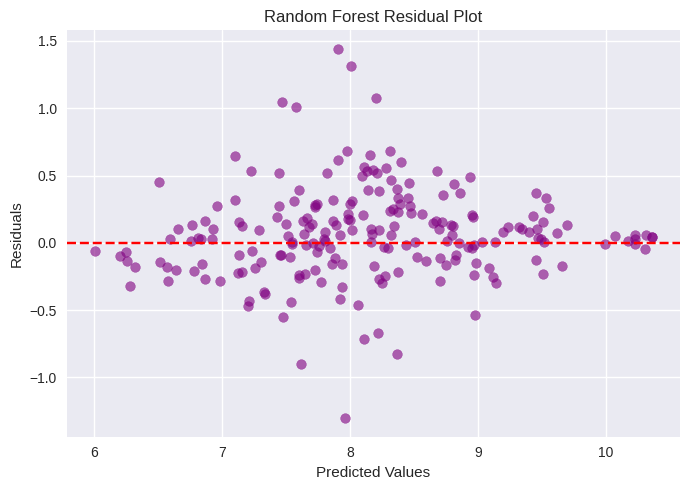

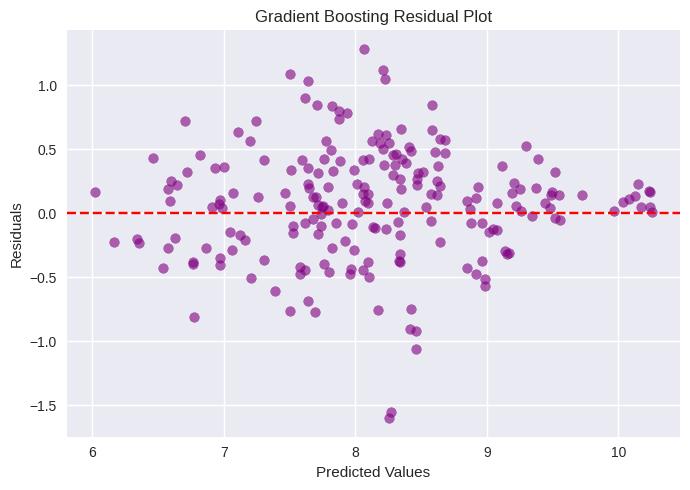

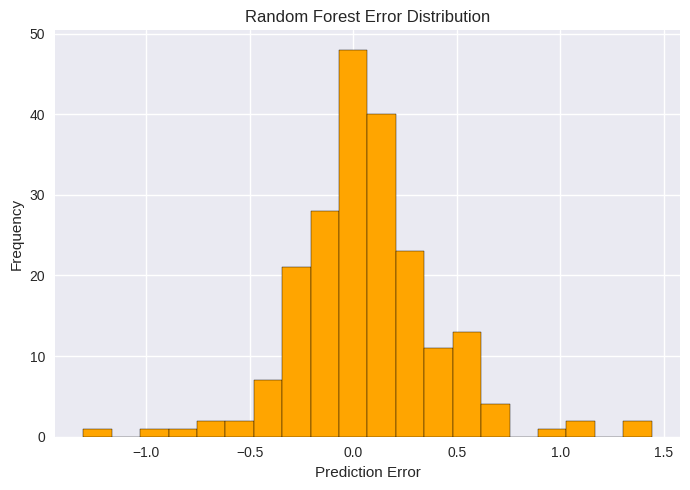

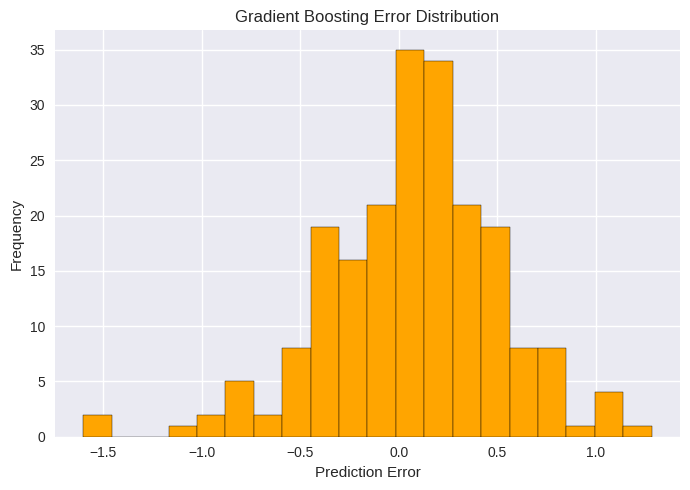

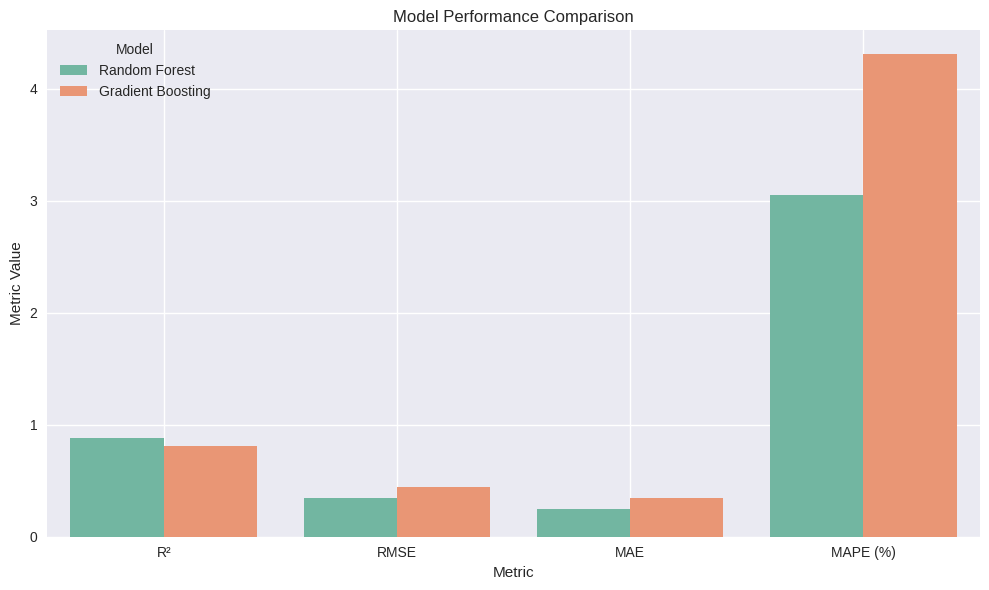

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)  # ✅ This was missing

# 1. Residual Plot
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(7, 5))
    plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{title} Residual Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred_rf, "Random Forest")
plot_residuals(y_test, y_pred_gb, "Gradient Boosting")

# 2. Error Distribution Histogram
def plot_error_distribution(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(7, 5))
    plt.hist(errors, bins=20, edgecolor='black', color='orange')
    plt.title(f"{model_name} Error Distribution")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_error_distribution(y_test, y_pred_rf, "Random Forest")
plot_error_distribution(y_test, y_pred_gb, "Gradient Boosting")

# 3. Model Metrics Comparison
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate RMSE manually to support older sklearn versions
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5

metrics = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'R²': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gb)],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb)],
    'MAPE (%)': [(abs((y_test - y_pred_rf) / y_test)).mean() * 100,
                 (abs((y_test - y_pred_gb) / y_test)).mean() * 100]
}


metrics_df = pd.DataFrame(metrics)
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted, palette='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.grid(True)

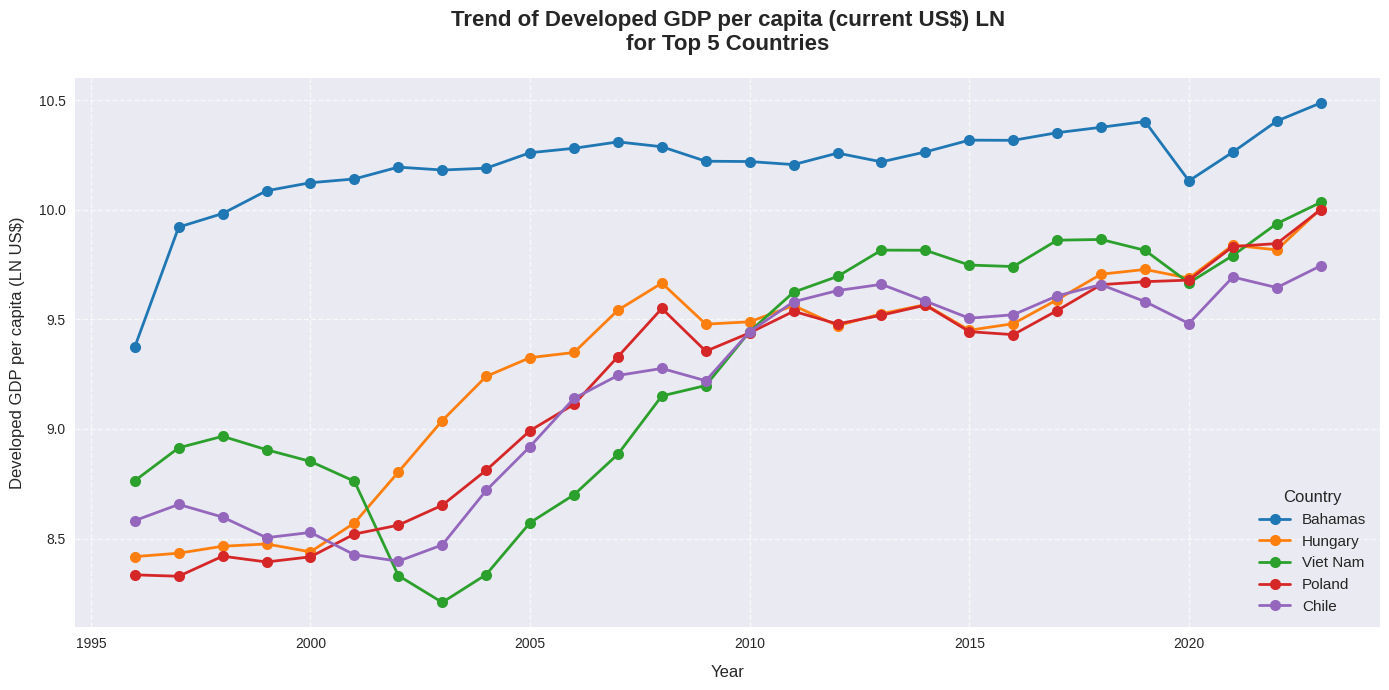

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("test developing 2 new.csv")

# Step 1: Find top 5 countries by average value of the target variable
top_5_countries = (
    df.groupby('countries')['GDP per capita (current US$) LN']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# Step 2: Filter the dataframe for those countries
df_top5 = df[df['countries'].isin(top_5_countries)]

# Step 3: Plot the trend
plt.figure(figsize=(14, 7))  # Slightly larger figure size

# Custom color palette for better distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, country in enumerate(top_5_countries):
    country_data = df_top5[df_top5['countries'] == country]
    plt.plot(country_data['Year'],
             country_data['GDP per capita (current US$) LN'],
             marker='o',
             linestyle='-',
             linewidth=2,
             markersize=8,
             color=colors[i],
             label=country)

# Customize plot appearance
plt.title('Trend of Developed GDP per capita (current US$) LN\nfor Top 5 Countries',
          fontsize=16,
          fontweight='bold',
          pad=20)

plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Developed GDP per capita (LN US$)', fontsize=12, labelpad=10)
plt.legend(title='Country', title_fontsize=12, fontsize=11)

# Improve grid and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add tight layout and show
plt.tight_layout()
plt.show()